In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('listings.csv')
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

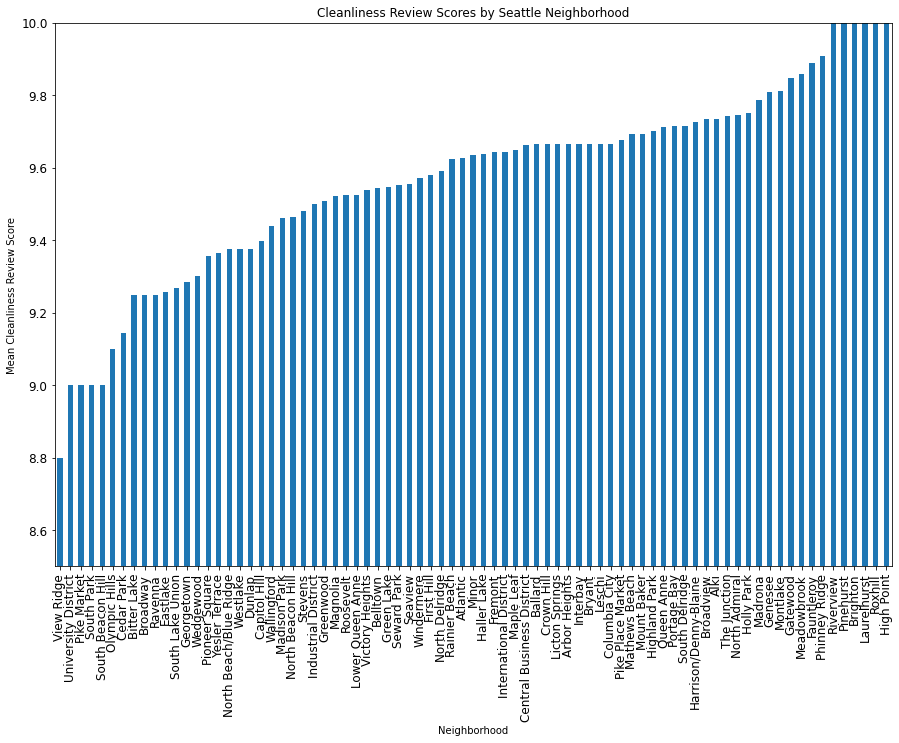

neighbourhood
Harrison/Denny-Blaine     9.727273
Broadview                 9.733333
Alki                      9.733333
The Junction              9.741935
North Admiral             9.744186
Holly Park                9.750000
Madrona                   9.787879
Genesee                   9.807692
Montlake                  9.812500
Gatewood                  9.846154
Meadowbrook               9.857143
Fauntleroy                9.888889
Phinney Ridge             9.906977
Riverview                10.000000
Pinehurst                10.000000
Brighton                 10.000000
Laurelhurst              10.000000
Roxhill                  10.000000
High Point               10.000000
Name: review_scores_cleanliness, dtype: float64


In [3]:
# neighborhood and cleanliness review scores
neighborhood_review = df.groupby(['neighbourhood']).mean()['review_scores_cleanliness'].sort_values().dropna()
neighborhood_review.plot.bar(
    fontsize = 12,
    title = 'Cleanliness Review Scores by Seattle Neighborhood',
    xlabel = 'Neighborhood', 
    ylabel = 'Mean Cleanliness Review Score', 
    ylim = (8.5,10),
    figsize = (15, 10))
plt.show()

print(neighborhood_review[neighborhood_review > np.percentile(neighborhood_review, 75)])

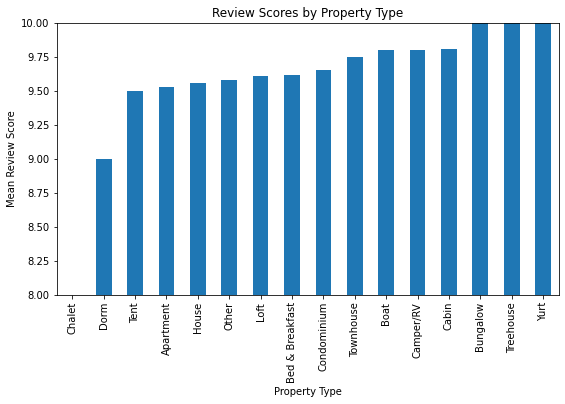

property_type
Cabin         9.809524
Bungalow     10.000000
Treehouse    10.000000
Yurt         10.000000
Name: review_scores_cleanliness, dtype: float64


In [4]:
# property type and cleanliness review scores
property_type_review = (df.groupby(['property_type']).mean()['review_scores_cleanliness'].sort_values().dropna())

property_type_review.plot.bar(
    title = 'Review Scores by Property Type',
    xlabel = 'Property Type', 
    ylabel = 'Mean Review Score', 
    ylim = (8,10),
    figsize = (9, 5))
plt.show()

print(property_type_review[property_type_review > np.percentile(property_type_review, 75)])

In [5]:
# Correlation between cleanliness review score and overall review scores?
X = df.review_scores_cleanliness.fillna(5).values.reshape(len(df.review_scores_cleanliness.values),1)
y = df.review_scores_value.fillna(5).values.reshape(len(df.review_scores_value.values),1)

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

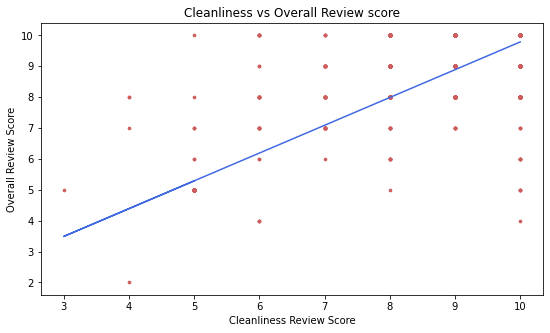

In [7]:
plt.figure(figsize = (9, 5))
plt.scatter(X, y, color = 'indianred', s = 7)
plt.plot(X, regr.predict(X), color = 'royalblue')
plt.title('Cleanliness vs Overall Review score')
plt.xlabel('Cleanliness Review Score')
plt.ylabel('Overall Review Score')
plt.show()
